In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df = pd.read_csv('/home/smr1020/bumper/CRASH_2019_STATEWIDE.csv',na_values=[' ','98','99'])

In [9]:
df.head()

,ARRIVAL_TM,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_SUSP_SERIOUS_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_SUSP_SERIOUS_INJ_COUNT,BUS_COUNT,CHLDPAS_DEATH_COUNT,CHLDPAS_SUSP_SERIOUS_INJ_COUNT,...,WZ_CLOSE_DETOUR,WZ_FLAGGER,WZ_LAW_OFFCR_IND,WZ_LN_CLOSURE,WZ_MOVING,WZ_OTHER,WZ_SHLDER_MDN,ROADWAY_CLEARED,WEATHER1,WEATHER2
0,508.0,0,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
1,1728.0,3,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2142.0,0,0,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2035.0,2,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
4,435.0,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN


In [10]:
encoding = {1:'Blowing Sand, Soil, Dirt',
2:'Blowing Snow',
3:'Clear',
4:'Cloudy',
5:'Fog, Smog, Smoke',
6:'Freezing Rain or Freezing Drizzle',
7:'Rain',
8:'Severe Crosswinds',
9:'Sleet or Hail',
10:'Snow',
}

len(df)


125267

In [11]:
df['WEATHER1'].unique()

array([ 3., nan,  4.,  8., 10.,  7.,  2.,  5.,  9.,  6.,  1.])

In [14]:
df = df.dropna(subset=['WEATHER1'])

In [16]:
df['WEATHER1'] = df['WEATHER1'].astype(int)

In [18]:
bars = np.zeros(len(df.groupby('WEATHER1').groups))
position = np.zeros(len(df.groupby('WEATHER1').groups))
for ind,group in enumerate(df.groupby('WEATHER1')):
    bars[ind] = len(group[1])
    position[ind] = group[0]

In [19]:
tick_number = position.astype(int)
labels = []
for number in tick_number:
    labels += [encoding[number]]


In [20]:
labels

['Blowing Sand, Soil, Dirt',
 'Blowing Snow',
 'Clear',
 'Cloudy',
 'Fog, Smog, Smoke',
 'Freezing Rain or Freezing Drizzle',
 'Rain',
 'Severe Crosswinds',
 'Sleet or Hail',
 'Snow']

list

In [21]:
def barh(position,labels,bars,ylim=None): 
    plt.figure(dpi=300)
    plt.title('Pennsylvania: Weather Conditions during Major Accidents')
    plt.bar(position,bars)
    plt.xticks(position,labels,rotation=45,ha='right')

    
    if ylim != None:
        y_min,y_max = ylim
        plt.ylim(y_min,y_max)

    plt.ylabel('Percent of Major Accidents')
    plt.grid(axis='y')
    ax = plt.gca()
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.tick_params(axis='y',left=False)

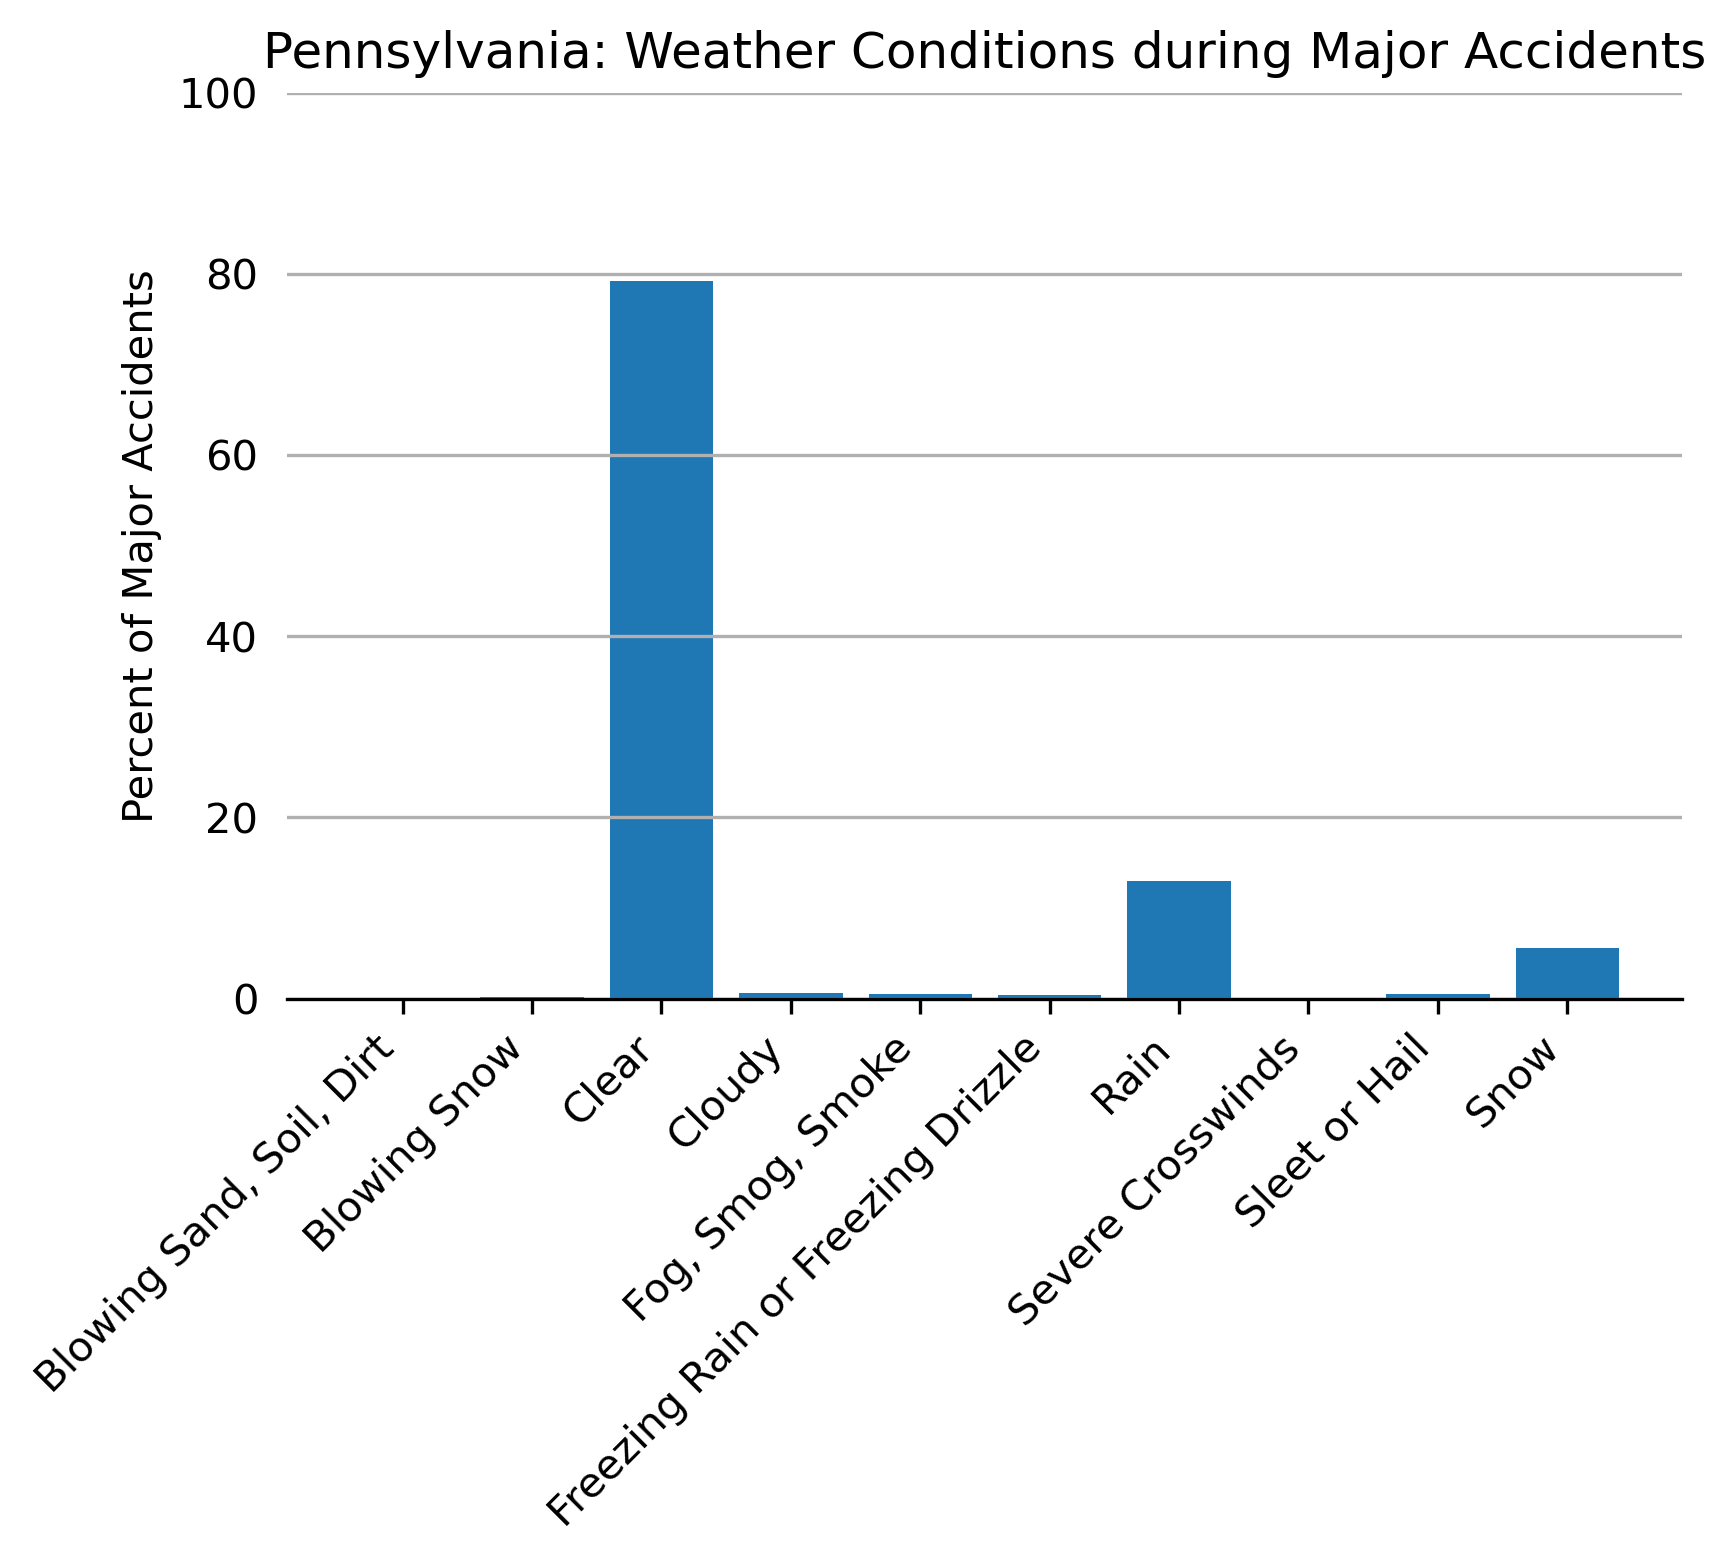

In [22]:
barh(position,labels,(bars/len(df))*100,ylim=(0,100))